<a href="https://colab.research.google.com/github/NarumiYatabe/Roam-research/blob/master/test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 準備

In [ ]:
# 環境整備

import pandas as pd
import numpy as np
import matplotlib.pyplot as  plt
import seaborn as sns
import os

# 分割ライブラリのインポート
from sklearn.model_selection import train_test_split

# モデル学習ライブラリのインポート
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures

# モデル評価ライブラリのインポート
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve

# 特徴量選択　ライブラリインポート
from sklearn.feature_selection import SelectFromModel


# ドライブへのマウント
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
# データ読み込み ここで全ファイル読み込んでおく
ROOT_PATH = "drive/MyDrive/signate/461"

train = pd.read_csv(ROOT_PATH + '/train.csv')
test =pd.read_csv(ROOT_PATH + '/test.csv')
sample = pd.read_csv(ROOT_PATH + '/sample_submission.csv', header=None)

pd.set_option('display.max_columns', 100) #列途中省略を防ぐ
train

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,0,1203,0,0.680981,1,1,1,23,0.402580,117,3,2,1331,721,1970,15,1,4,1,0,1,2
1,3,1203,1,2.602754,1,0,0,8,0.415612,194,1,19,1571,1262,1150,14,16,14,1,0,1,3
2,4,1980,1,2.604065,1,0,0,6,0.858110,122,2,15,364,721,1970,18,12,11,1,0,1,1
3,5,1185,1,2.669403,1,3,0,33,0.027065,132,8,4,447,1162,1950,15,3,19,1,0,0,2
4,7,1203,1,2.375453,0,4,1,12,0.141485,135,6,5,364,1917,1970,16,7,6,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,1994,710,0,1.827054,0,0,1,61,0.139117,199,6,7,788,1023,3269,12,4,2,1,1,1,1
1196,1995,965,1,0.498963,0,6,0,32,0.923505,103,1,2,813,721,1970,18,5,20,1,0,0,3
1197,1996,1949,0,0.470755,0,1,0,38,0.798602,134,6,20,115,1951,1598,18,3,17,0,0,0,1
1198,1997,1537,0,1.323370,0,1,1,4,0.122960,187,3,7,376,1692,3952,14,2,9,1,1,0,1


## 提出用サンプルファイル

In [ ]:
# 提出用サンプルファイルの形状を確認
sample
# 1列目に評価用データの"id"を、2列目に予測した"肝疾患の有無 (0 or 1)"

,0,1
0,1,0
1,2,0
2,6,0
3,10,0
4,12,0
...,...,...
795,1978,0
796,1980,0
797,1982,0
798,1988,0


# 前処理


In [ ]:
print(train.shape)
print(test.shape)

# データ型と行数列数確認
print(train.info())

(1200, 22)
(800, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1200 non-null   int64  
 1   battery_power  1200 non-null   int64  
 2   blue           1200 non-null   int64  
 3   clock_speed    1200 non-null   float64
 4   dual_sim       1200 non-null   int64  
 5   fc             1200 non-null   int64  
 6   four_g         1200 non-null   int64  
 7   int_memory     1200 non-null   int64  
 8   m_dep          1200 non-null   float64
 9   mobile_wt      1200 non-null   int64  
 10  n_cores        1200 non-null   int64  
 11  pc             1200 non-null   int64  
 12  px_height      1200 non-null   int64  
 13  px_width       1200 non-null   int64  
 14  ram            1200 non-null   int64  
 15  sc_h           1200 non-null   int64  
 16  sc_w           1200 non-null   int64  
 17  talk_time      1200 non-null   

## 欠損値

In [ ]:
# 欠損値の確認
print(train.isnull().sum()) # AG_ratioに欠損値があるとわかる

id               0
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64


## 重複データ

In [ ]:
#重複データの確認
print(train.duplicated().sum())

0


# データの特徴の洗い出し

## 基本統計量の確認

In [ ]:
# 基本統計量の確認
pd.set_option('display.max_columns', 15)
train.describe(include='all')

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,...,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,...,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,1014.411667,1208.958333,0.408333,1.231201,0.565833,1.452500,0.625833,...,11.970000,4.717500,10.376667,0.891667,0.410833,0.455000,1.620000
std,577.846419,421.707099,0.491730,0.786728,0.495854,2.590045,0.484109,...,4.304595,3.346445,5.180942,0.310931,0.492190,0.498179,1.018069
min,0.000000,518.000000,0.000000,0.466459,0.000000,0.000000,0.000000,...,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,517.750000,916.000000,0.000000,0.498935,0.000000,0.000000,0.000000,...,7.000000,2.000000,7.000000,1.000000,0.000000,0.000000,1.000000
50%,1030.500000,1203.000000,0.000000,1.086733,1.000000,0.000000,1.000000,...,12.000000,4.000000,9.000000,1.000000,0.000000,0.000000,2.000000
75%,1504.250000,1537.000000,1.000000,1.864943,1.000000,2.000000,1.000000,...,16.000000,7.000000,14.000000,1.000000,1.000000,1.000000,2.000000
max,1999.000000,1991.000000,1.000000,2.730560,1.000000,16.000000,1.000000,...,19.000000,16.000000,20.000000,1.000000,1.000000,1.000000,3.000000


## 可視化

### 目的変数の確認と可視化

In [ ]:
train['price_range'].value_counts()

,count
price_range,
2,420
1,300
3,268
0,212


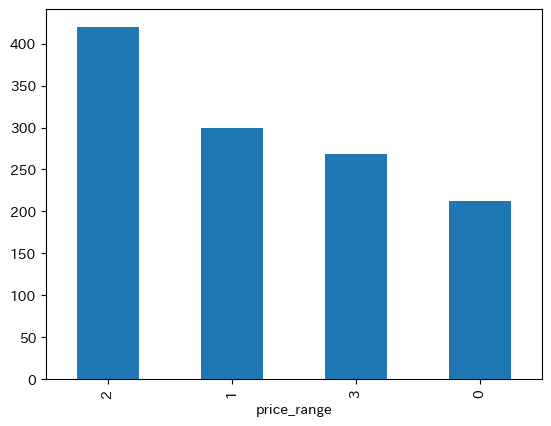

In [ ]:
price_range_count = train['price_range'].value_counts()
plt.figure(facecolor='w')
price_range_count.plot(kind='bar')
plt.show() # 大体同じくらいの数

### **カテゴリ変数と数量変数の分離**

In [ ]:
#今回カテゴリ変数は無し
# 0と1や目的変数の0123は数値としての意味を持たないため、2値のデータを持つカラム群はカテゴリ変数として扱う。

col_categoric = ["blue", "dual_sim", "four_g", "three_g", "touch_screen", "wifi", "price_range"] # 抽出するリスト指定
train_numeric = train.drop(col_categoric, axis = 1) # カテゴリ変数列のみ削除
train_categoric = train[col_categoric] # カテゴリ変数列のみをもつdataframe

train_numeric

,id,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time
0,0,1203,0.680981,1,23,0.402580,117,3,2,1331,721,1970,15,1,4
1,3,1203,2.602754,0,8,0.415612,194,1,19,1571,1262,1150,14,16,14
2,4,1980,2.604065,0,6,0.858110,122,2,15,364,721,1970,18,12,11
3,5,1185,2.669403,3,33,0.027065,132,8,4,447,1162,1950,15,3,19
4,7,1203,2.375453,4,12,0.141485,135,6,5,364,1917,1970,16,7,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,1994,710,1.827054,0,61,0.139117,199,6,7,788,1023,3269,12,4,2
1196,1995,965,0.498963,6,32,0.923505,103,1,2,813,721,1970,18,5,20
1197,1996,1949,0.470755,1,38,0.798602,134,6,20,115,1951,1598,18,3,17
1198,1997,1537,1.323370,1,4,0.122960,187,3,7,376,1692,3952,14,2,9


In [ ]:
train_categoric

,blue,dual_sim,four_g,three_g,touch_screen,wifi,price_range
0,0,1,1,1,0,1,2
1,1,1,0,1,0,1,3
2,1,1,0,1,0,1,1
3,1,1,0,1,0,0,2
4,1,0,1,1,1,1,0
...,...,...,...,...,...,...,...
1195,0,0,1,1,1,1,1
1196,1,0,0,1,0,0,3
1197,0,0,0,0,0,0,1
1198,0,0,1,1,1,0,1


In [ ]:
train_categoric['dual_sim'] = train_categoric['dual_sim'].map({1: 'あ', 0: 'い'}).astype('object')
train_categoric

<ipython-input-37-701b0eea71b6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_categoric['dual_sim'] = train_categoric['dual_sim'].map({1: 'あ', 0: 'い'}).astype('object')


,blue,dual_sim,four_g,three_g,touch_screen,wifi,price_range
0,0,あ,1,1,0,1,2
1,1,あ,0,1,0,1,3
2,1,あ,0,1,0,1,1
3,1,あ,0,1,0,0,2
4,1,い,1,1,1,1,0
...,...,...,...,...,...,...,...
1195,0,い,1,1,1,1,1
1196,1,い,0,1,0,0,3
1197,0,い,0,0,0,0,1
1198,0,い,1,1,1,0,1


In [ ]:
#変数に入っている値ごとに、データの個数がいくつあるかをカウント
print("---blue---")
print(train_categoric["blue"].value_counts())
print()
print("---dual_sim---")
print(train_categoric["dual_sim"].value_counts())
print()
print("---four_g---")
print(train_categoric["four_g"].value_counts())
print()
print("---three_g---")
print(train_categoric["three_g"].value_counts())
print()
print("---touch_screen---")
print(train_categoric["touch_screen"].value_counts())
print()
print("---wifi---")
print(train_categoric["wifi"].value_counts())
print()
print("---price_range---")
print(train_categoric["price_range"].value_counts())

---blue---
blue
0    710
1    490
Name: count, dtype: int64

---dual_sim---
dual_sim
1    679
0    521
Name: count, dtype: int64

---four_g---
four_g
1    751
0    449
Name: count, dtype: int64

---three_g---
three_g
1    1070
0     130
Name: count, dtype: int64

---touch_screen---
touch_screen
0    707
1    493
Name: count, dtype: int64

---wifi---
wifi
0    654
1    546
Name: count, dtype: int64

---price_range---
price_range
2    420
1    300
3    268
0    212
Name: count, dtype: int64


### 各説明変数の可視化

#### 数量変数の可視化

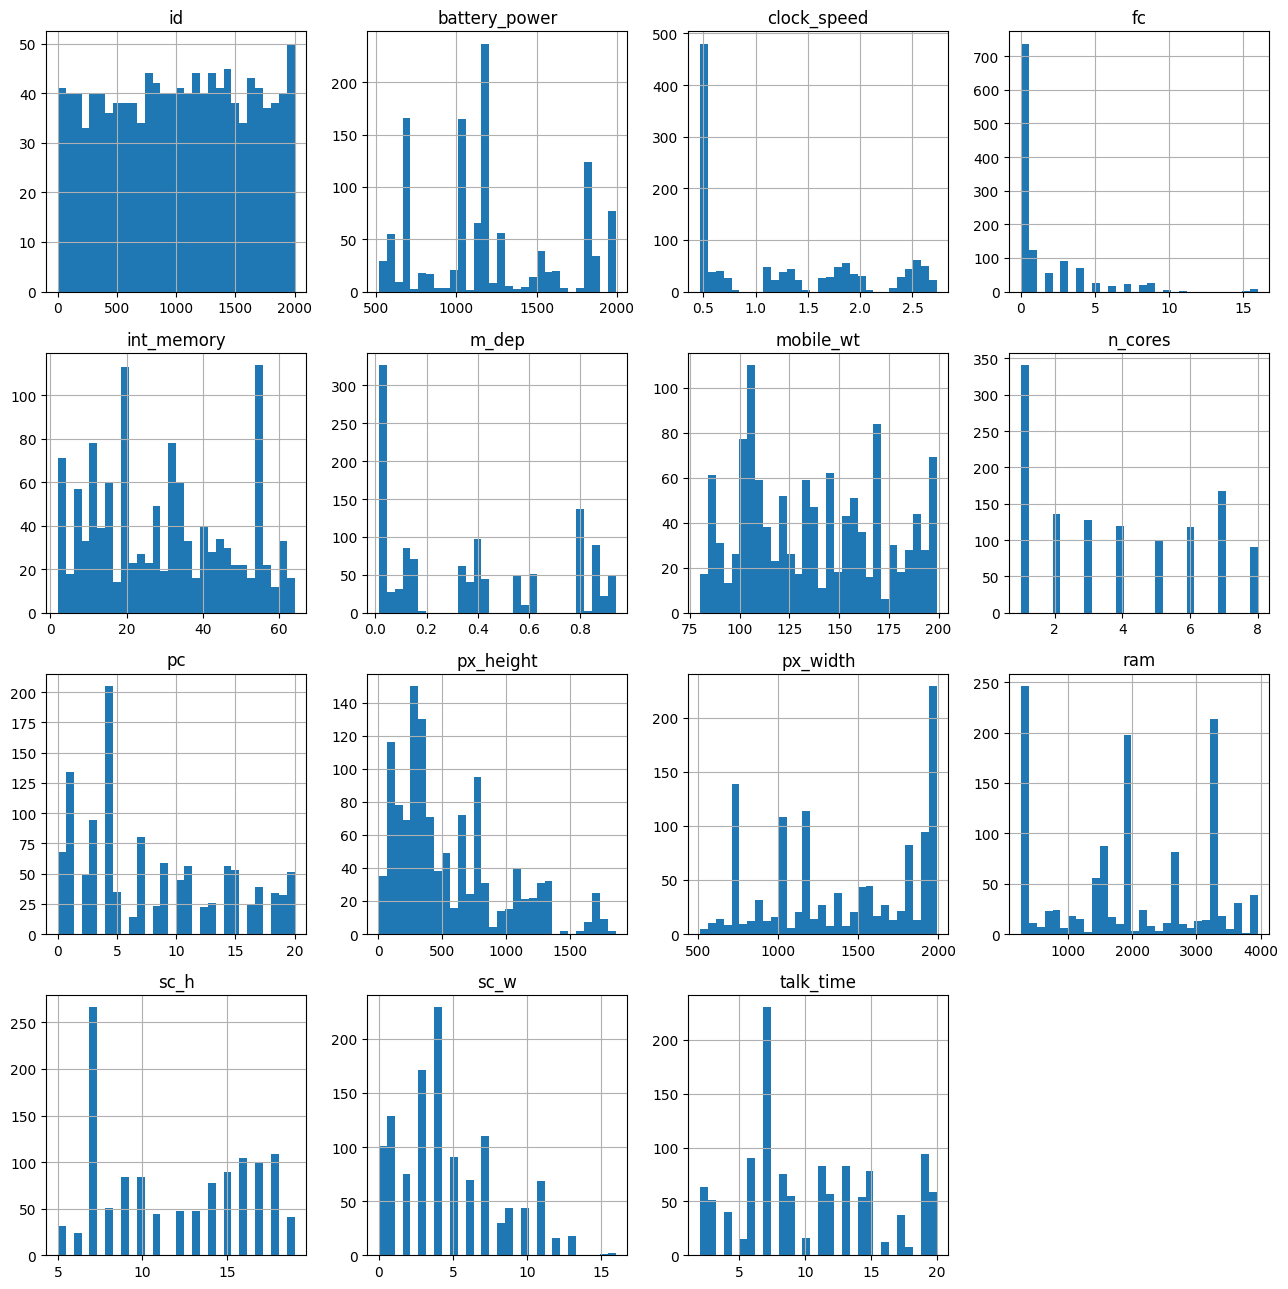

In [ ]:
train_numeric.hist(bins=30, figsize=(13, 13)) #ビンは細かく
plt.tight_layout()
plt.show()

### 目的変数のクラスごとの可視化

#### 目的変数の結合

In [ ]:
"""
目的変数の結合

今回の目的の手掛かりを得るため、price_rangeのカテゴリごとに分けて、データの分布を見ていく。
"""

# 目的変数price_rangeのカテゴリ毎に分けてヒストグラムを表示するため、
# 数量変数として分離したデータフレームtrain_numericに、目的変数のprice_range列を再度結合(横結合)
train_tmp = pd.concat([train_categoric["price_range"], train_numeric], axis=1)

# 結合したデータフレームの最初の5行を表示
train_tmp.head()

,price_range,id,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time
0,2,0,1203,0.680981,1,23,0.402580,117,3,2,1331,721,1970,15,1,4
1,3,3,1203,2.602754,0,8,0.415612,194,1,19,1571,1262,1150,14,16,14
2,1,4,1980,2.604065,0,6,0.858110,122,2,15,364,721,1970,18,12,11
3,2,5,1185,2.669403,3,33,0.027065,132,8,4,447,1162,1950,15,3,19
4,0,7,1203,2.375453,4,12,0.141485,135,6,5,364,1917,1970,16,7,6


#### 可視化

###### 全体

In [ ]:
# プロットしたい特徴量リスト
features = train_tmp.columns.tolist()
features

['price_range',
 'id',
 'battery_power',
 'clock_speed',
 'fc',
 'int_memory',
 'm_dep',
 'mobile_wt',
 'n_cores',
 'pc',
 'px_height',
 'px_width',
 'ram',
 'sc_h',
 'sc_w',
 'talk_time']

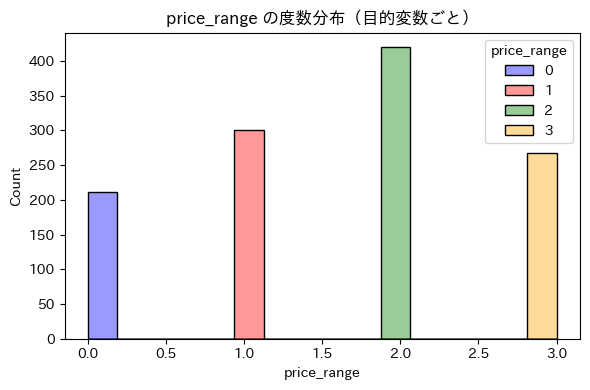

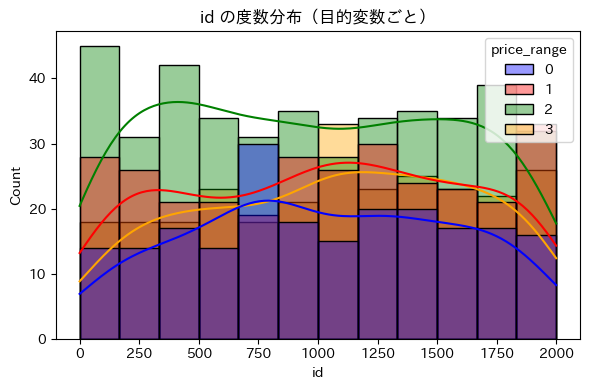

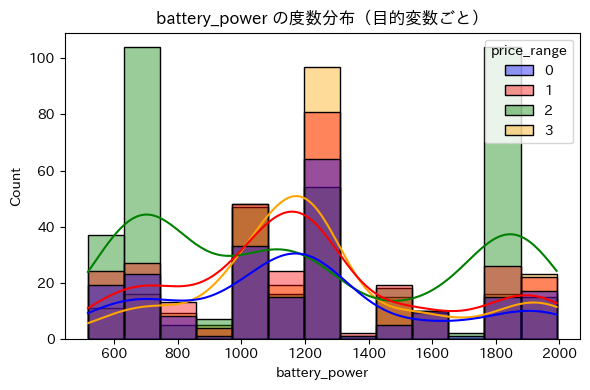

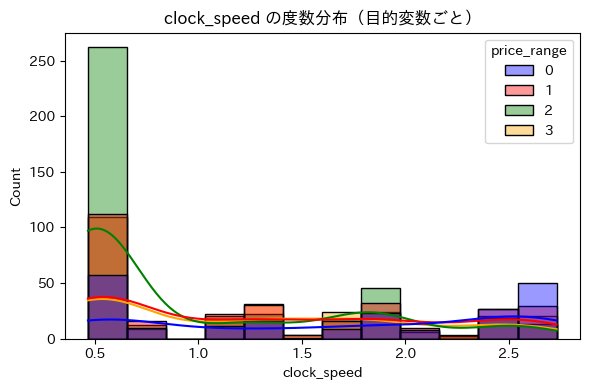

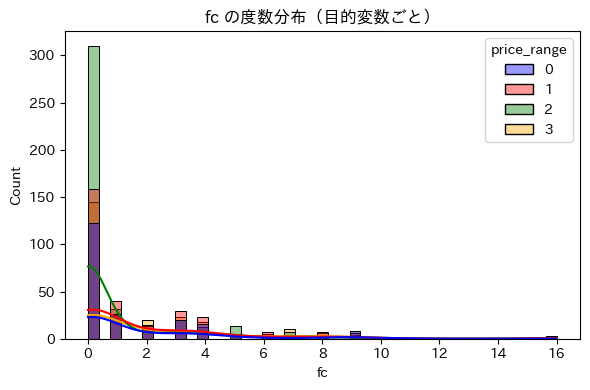

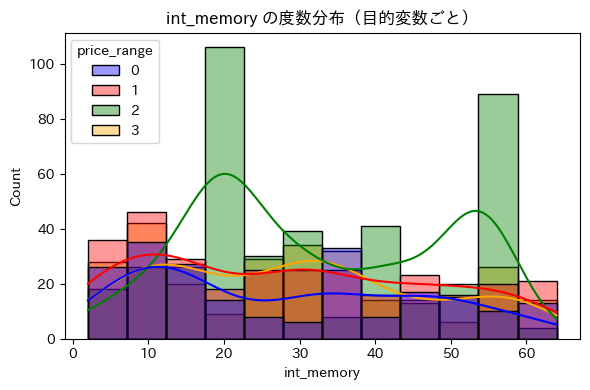

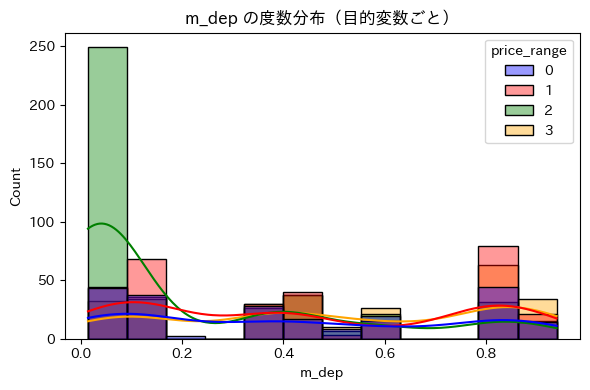

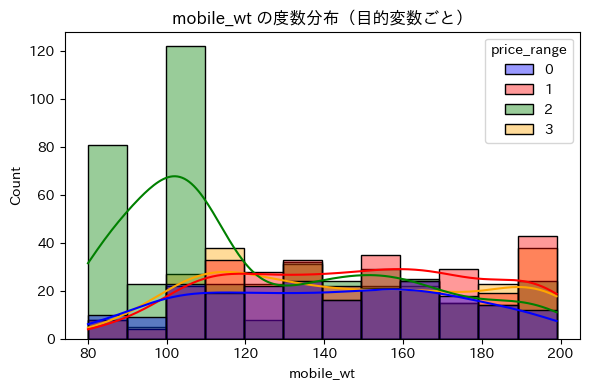

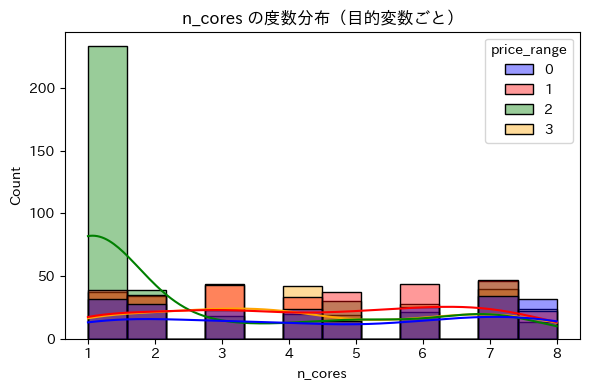

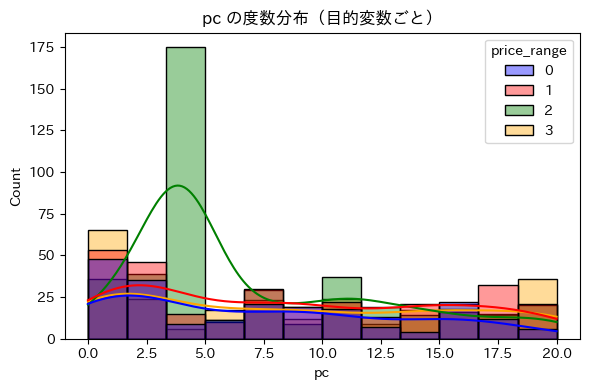

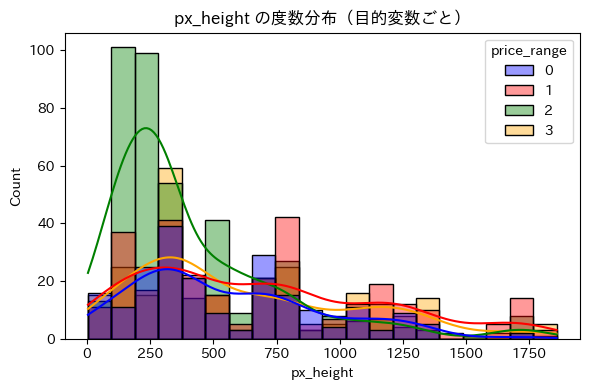

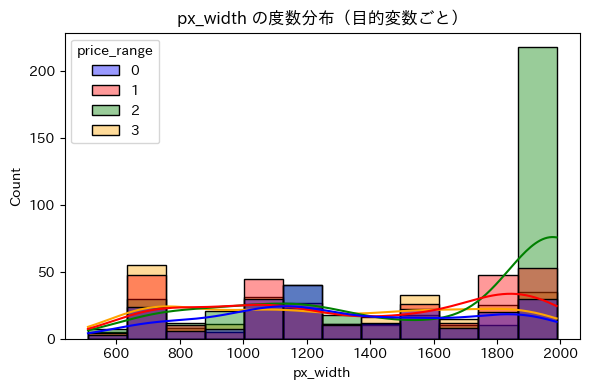

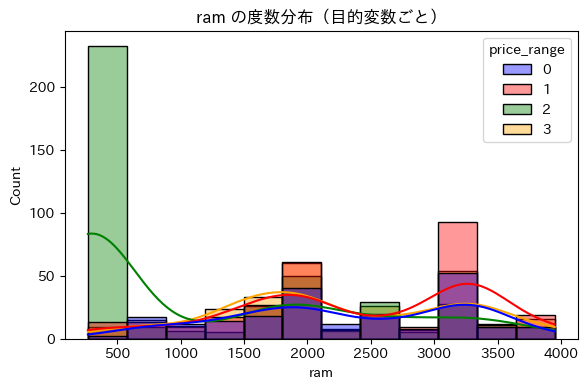

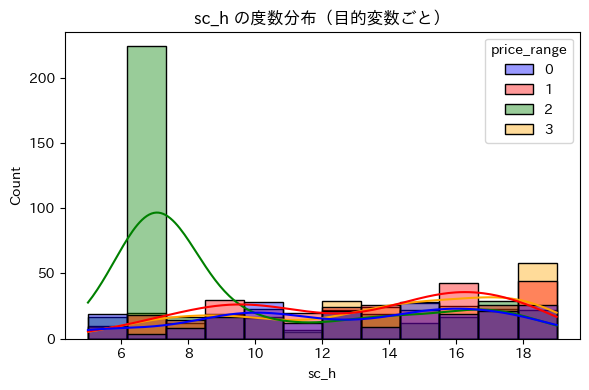

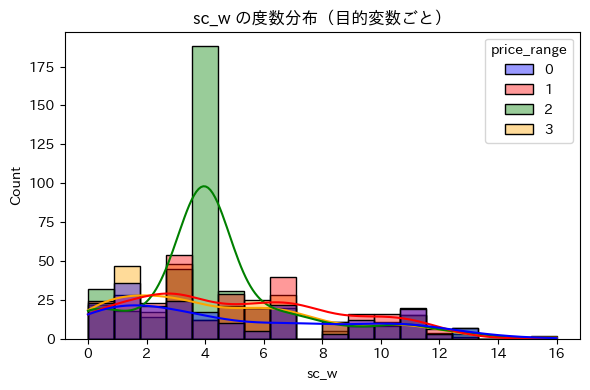

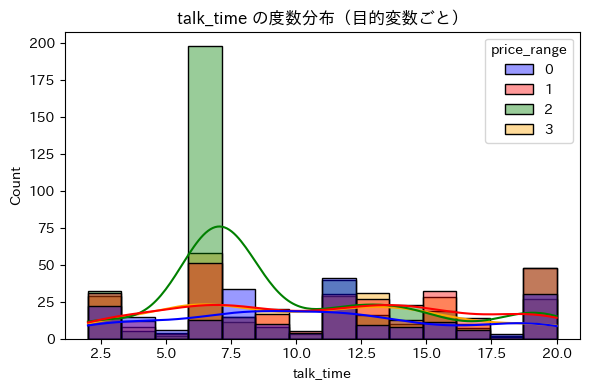

In [ ]:
!pip install japanize-matplotlib
import japanize_matplotlib

# 任意の色を指定（targetごと）★
palette = {0: 'blue', 1: 'red', 2: 'green', 3: 'orange'}


# 特徴量ごとにプロット
for col in features: # featuresはカラム名を指定★
    plt.figure(figsize=(6, 4))
    # ヒストグラム + KDE（線グラフ）両方を描画
    sns.histplot(
        data=train_tmp,     # 可視化するデータセット名を指定★
        x=col,
        hue='price_range',  # 目的変数を指定★
        multiple='layer',   # 重ねて表示（線を引くときは dodge より自然）
        #bins=6,            # bin数を指定。指定しない場合は自動
        kde=True,           # KDE を追加（線グラフ）
        palette=palette,
        alpha=0.4
    )
    plt.title(f'{col} の度数分布（目的変数ごと）')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

In [ ]:
train_categoric

,blue,dual_sim,four_g,three_g,touch_screen,wifi,price_range
0,0,あ,1,1,0,1,2
1,1,あ,0,1,0,1,3
2,1,あ,0,1,0,1,1
3,1,あ,0,1,0,0,2
4,1,い,1,1,1,1,0
...,...,...,...,...,...,...,...
1195,0,い,1,1,1,1,1
1196,1,い,0,1,0,0,3
1197,0,い,0,0,0,0,1
1198,0,い,1,1,1,0,1


In [ ]:
"""
目的変数の結合

今回の目的の手掛かりを得るため、price_rangeのカテゴリごとに分けて、データの分布を見ていく。
"""

# 目的変数price_rangeのカテゴリ毎に分けてヒストグラムを表示するため、
# 数量変数として分離したデータフレームtrain_numericに、目的変数のprice_range列を再度結合(横結合)
train_tmp_c = pd.concat([train_categoric["price_range"], train_categoric], axis=1)

# 結合したデータフレームの最初の5行を表示
train_tmp_c.head()

,price_range,blue,dual_sim,four_g,three_g,touch_screen,wifi,price_range
0,2,0,あ,1,1,0,1,2
1,3,1,あ,0,1,0,1,3
2,1,1,あ,0,1,0,1,1
3,2,1,あ,0,1,0,0,2
4,0,1,い,1,1,1,1,0


In [ ]:
# プロットしたい特徴量リスト
features_c = train_categoric.columns.tolist()
features_c

['blue',
 'dual_sim',
 'four_g',
 'three_g',
 'touch_screen',
 'wifi',
 'price_range']

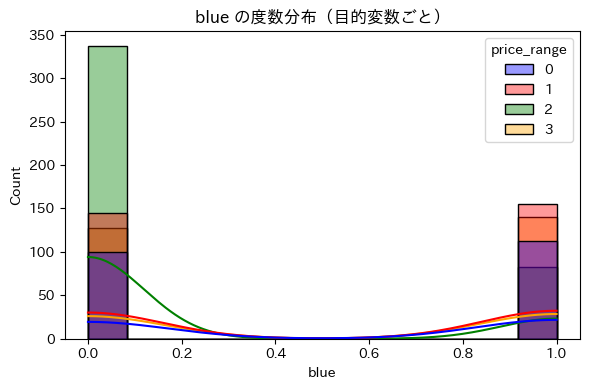

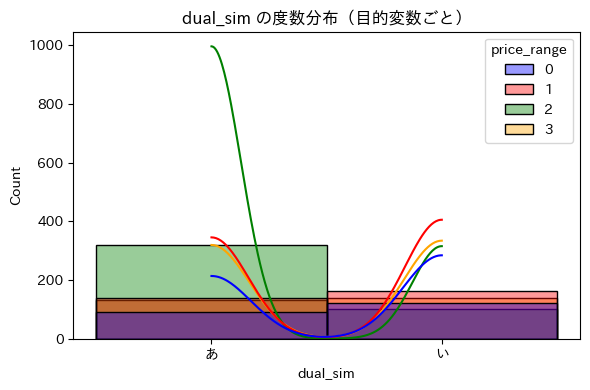

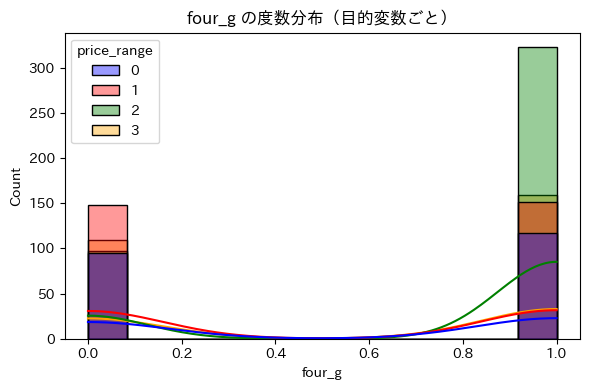

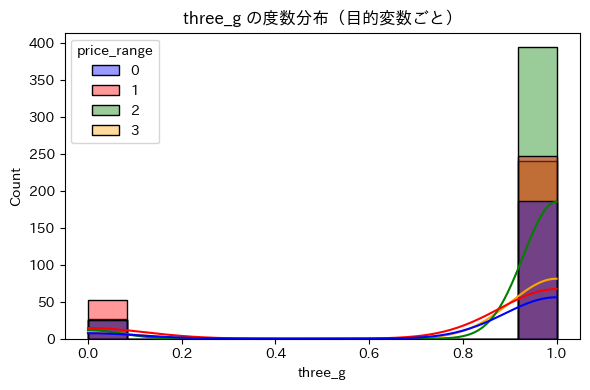

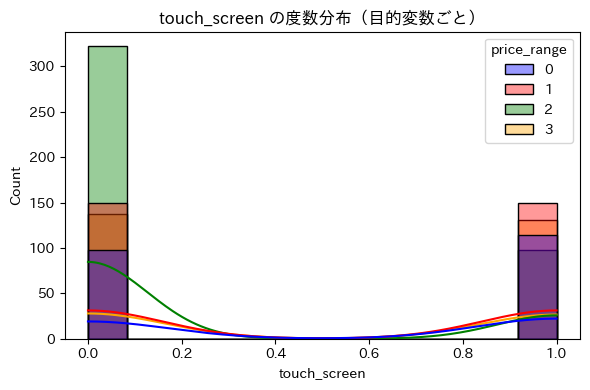

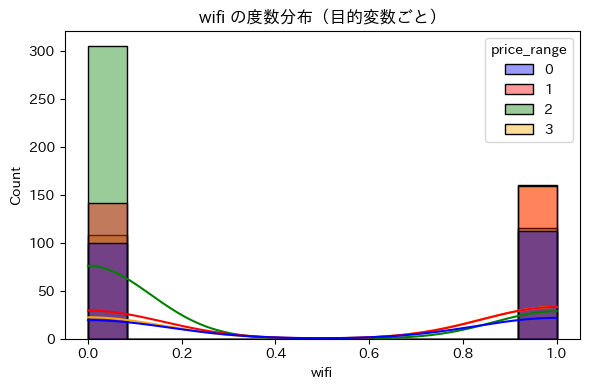

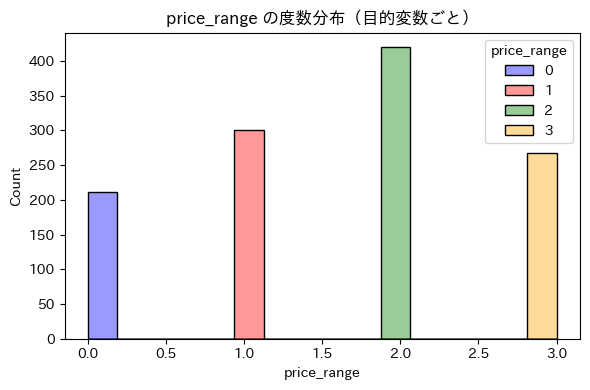

In [ ]:

# 任意の色を指定（targetごと）★
palette = {0: 'blue', 1: 'red', 2: 'green', 3: 'orange'}


# 特徴量ごとにプロット
for col in features_c: # featuresはカラム名を指定★
    plt.figure(figsize=(6, 4))
    # ヒストグラム + KDE（線グラフ）両方を描画
    sns.histplot(
        data=train_categoric,     # 可視化するデータセット名を指定★
        x=col,
        hue='price_range',  # 目的変数を指定★
        multiple='layer',   # 重ねて表示（線を引くときは dodge より自然）
        #bins=6,            # bin数を指定。指定しない場合は自動
        kde=True,           # KDE を追加（線グラフ）
        palette=palette,
        alpha=0.4
    )
    plt.title(f'{col} の度数分布（目的変数ごと）')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

AttributeError: module 'seaborn' has no attribute 'hisplot'

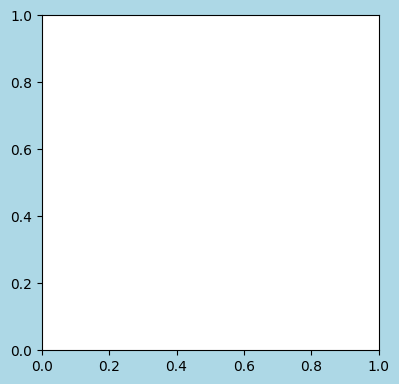

In [ ]:
#まとめてグラフの表示
plt.figure(figsize=(20, 20), facecolor='lightblue')

for ncol, colname in enumerate(train_numeric.columns):
    plt.subplot(4, 4, ncol+1)
    sns.distplot(train_tmp.query("price_range==0")[colname])
    sns.distplot(train_tmp.query("price_range==1")[colname])
    sns.distplot(train_tmp.query("price_range==2")[colname])
    sns.distplot(train_tmp.query("price_range==3")[colname])
    plt.legend(labels=["0", "1", "2", "3"], loc='upper right')
plt.show()

### 相関関係のヒートマップ

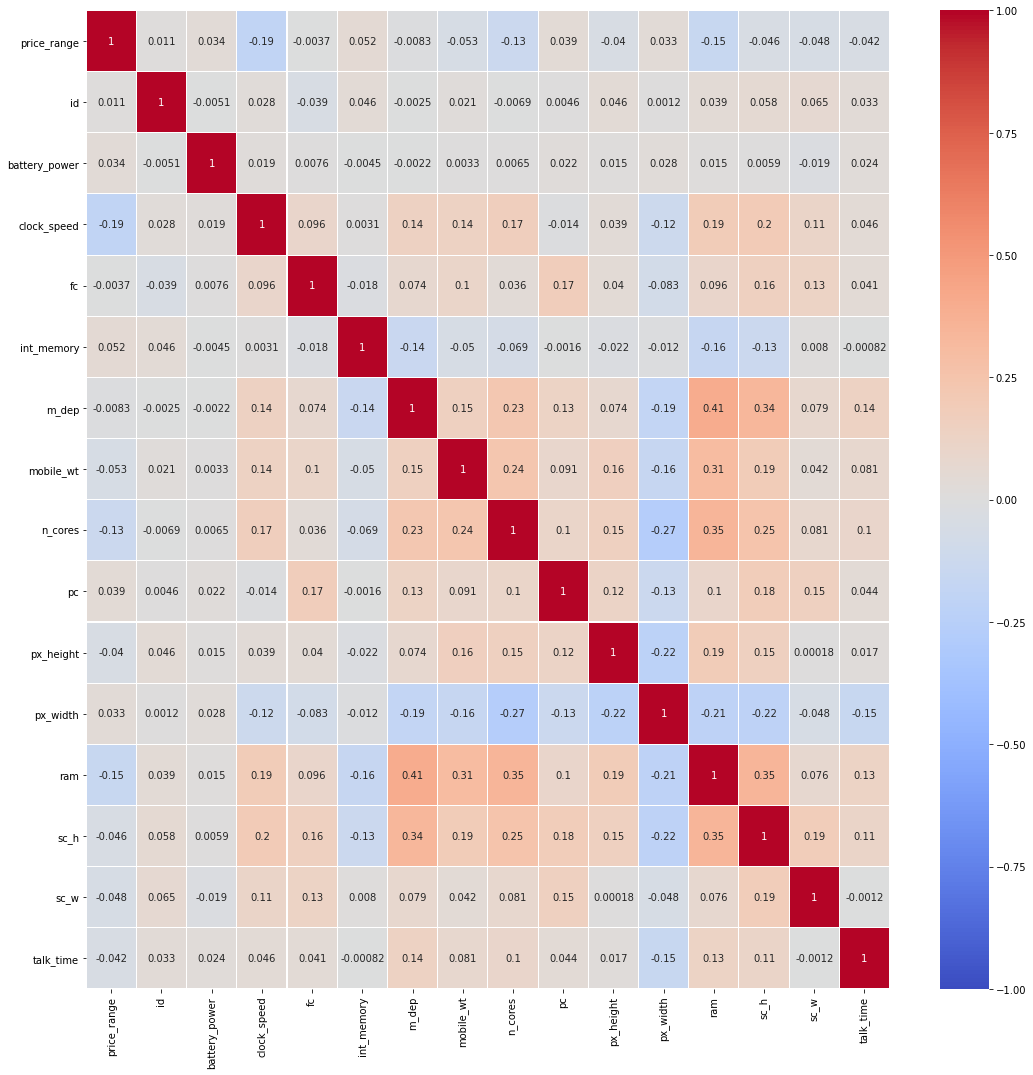

In [ ]:
plt.figure(figsize=(18, 18))
sns.heatmap(train_tmp.corr(), annot=True, vmin=-1.0, vmax=1.0, cmap='coolwarm', linewidth=0.1)
plt.show()

# 統計モデリング

## データ前処理

### for モデル作成

#### データの分割　説明変数と目的変数

In [ ]:
# 説明変数のデータフレーム
X =  train.drop(["price_range"], axis=1) #数量変数に直したprice_range列も含めた説明変数のデータフレーム

# 目的変数のデータフレーム
y = train["price_range"]

print(X)
print(y)

        id  battery_power  blue  clock_speed  dual_sim  fc  four_g  ...   ram  \
0        0           1203     0     0.680981         1   1       1  ...  1970   
1        3           1203     1     2.602754         1   0       0  ...  1150   
2        4           1980     1     2.604065         1   0       0  ...  1970   
3        5           1185     1     2.669403         1   3       0  ...  1950   
4        7           1203     1     2.375453         0   4       1  ...  1970   
...    ...            ...   ...          ...       ...  ..     ...  ...   ...   
1195  1994            710     0     1.827054         0   0       1  ...  3269   
1196  1995            965     1     0.498963         0   6       0  ...  1970   
1197  1996           1949     0     0.470755         0   1       0  ...  1598   
1198  1997           1537     0     1.323370         0   1       1  ...  3952   
1199  1999            710     0     1.961603         1   0       0  ...  3269   

      sc_h  sc_w  talk_time

### for モデル性能評価



##### trainデータとtestデータの分割

In [ ]:
# データの分割(１回目)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print(X_train.head())

# データの分割(２回目)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print(X_train.head())

        id  battery_power  blue  clock_speed  dual_sim  fc  four_g  ...   ram  \
927   1550           1203     0     1.677324         1   0       0  ...  3269   
506    870           1203     0     2.607814         1   0       0  ...   790   
323    565           1027     1     0.555295         0   0       1  ...  1970   
1101  1848           1980     0     2.535098         1   0       0  ...  3952   
868   1452            574     0     0.698463         0   0       0  ...   824   

      sc_h  sc_w  talk_time  three_g  touch_screen  wifi  
927     17    11          7        0             0     1  
506     17     0         12        1             0     1  
323     14     2         13        1             1     1  
1101     9     1         20        1             1     1  
868      8    13          7        1             0     1  

[5 rows x 21 columns]
       id  battery_power  blue  clock_speed  dual_sim  fc  four_g  ...   ram  \
611  1046           1027     1     1.835572         1   

In [ ]:
# データサイズの確認
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(840, 21)
(360, 21)
(840,)
(360,)


## !!!!!!!!!モデリング開始

In [ ]:
def ここで止める

SyntaxError: ignored

## ロジスティック回帰 /

### モデル作成・学習

In [ ]:
# モデルの学習

# モデルの初期化
lr = LogisticRegression()

lr.fit(X_train, y_train) #fit()で学習

### モデル予測

In [ ]:
#各係数の値を表示
print('----- coef_ -------')
print(lr.coef_)
print()
print('----- intercept_ -----')
print(lr.intercept_)
print()

#予測値
np.set_printoptions(suppress=True) #指数表記の禁止
lr_result = lr.predict_proba(X_test)
print('-----[0 1 2 3]（最初の5つのみ表示-----')
print(lr_result[:5])
print()
print('-----予測結果-----')
print(lr.predict(X_test)) #テストデータを分類
print()

# 疾患有り(1)に分類される確率のみ抽出
lr_result_1 = lr_result[:, 1]
#print(lr_result_1[:5])
print("確率が0.4を超える数 = ", sum(lr_result_1 > 0.3))
print("確率が0.5を超える数 = ", sum(lr_result_1 > 0.4))
print()

#accuracy
print('正解率(train): {:.3f}'.format(lr.score(X_train, y_train)))
print('正解率(test): {:.3f}'.format(lr.score(X_test, y_test)))

#### 提出用ファイルの作成

In [ ]:
submit_lr = sample
result_lr = lr.predict(test)

# 提出用のデータフレームを作成する
submit_lr[1] = result_lr
submit_lr

In [ ]:
# 提出用に整形して，出力
submit_lr.to_csv(ROOT_PATH + '/submit_lr.csv', index=False, header=False)

###モデル性能評価　パスしておく

In [ ]:
# 混同行列の作成
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)

# 混同行列をデータフレーム化
df_cm = pd.DataFrame(np.rot90(cm, 2), index=["actual_Positive", "actual_Negative"], columns=["predict_Positive", "predict_Negative"])
print(df_cm)

# heatmapによる混同行列の可視化
sns.heatmap(df_cm, annot=True, fmt="2g", cmap='Blues')
plt.yticks(va='center')
plt.show()

In [ ]:
# AUCスコアの算出
auc_score = roc_auc_score(y_true=y_test, y_score=result_1)
print(auc_score)

In [ ]:
# ROC曲線の要素（偽陽性率、真陽性率、閾値）の算出
fpr, tpr, thresholds = roc_curve(y_true=y_test, y_score=result_1)

# ROC曲線の描画
plt.plot(fpr, tpr, label='roc curve (area = %0.3f)' % auc_score)
plt.plot([0, 1], [0, 1], linestyle=':', label='random')
plt.plot([0, 0, 1], [0, 1, 1], linestyle=':', label='ideal')
plt.legend()
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.show()

###モデル改善

#### ビニング

In [ ]:
# とりあえず10 分割。分布を見てみる。この次の境界値指定で、分布が万遍なくなるように手動で指定していくため。
X_cut, bin_indice = pd.cut(X["AG_ratio"], bins=10, retbins=True)
print("--- bin区切りごとのデータ数 ---")
print(X_cut.value_counts())

In [ ]:
# 境界値を指定したbinの分割　AG_ratioは小数点第2位までの値
bins_AG_ratio = [0.3, 0.8, 0.98, 1.15, 2.97]
X_cut, bin_indice = pd.cut(X["AG_ratio"], bins=bins_AG_ratio, retbins=True)

# bin分割した結果の表示
print("binの区切り: ", bin_indice)

print("--- bin区切りごとのデータ数 ---")
print(X_cut.value_counts())

In [ ]:
# 分割し、0始まりの連番でラベル化した結果を、X_cutに格納する
X_cut, bin_indice = pd.cut(X["AG_ratio"], bins=bins_AG_ratio, retbins=True, labels=False)

# bin分割した結果をダミー変数化 (prefix=X_Cut.nameは、列名の接頭語を指定している)
X_dummies = pd.get_dummies(X_cut, prefix=X_cut.name)

# 元の説明変数のデータフレーム(X)と、ダミー変数化の結果(X_dummies)を横連結
X_binned = pd.concat([X, X_dummies], axis=1)

# 結果の確認
print(X_binned.head())
print()

print(X_cut.value_counts())

In [ ]:
# 新たに生成した特徴量を使って再度モデリング

# 学習用・評価用データの分割（元の説明変数Xの代わりに、bin分割したX_binnedを使う）
X_train, X_test, y_train, y_test = train_test_split(X_binned, y, test_size=0.5, random_state=0)

# モデルの学習・予測
lr_binning = LogisticRegression()
lr_binning.fit(X_train, y_train)
y_pred = lr_binning.predict_proba(X_test)[:, 1]
print('-----予測結果　無し0有り1-----')
lr_binning_result = lr_binning.predict(X_test)
print(lr_binning_result) #テストデータを分類
print()


# ROC曲線の描画（偽陽性率、真陽性率、閾値の算出）
fpr, tpr, thresholds = roc_curve(y_true=y_test, y_score=y_pred)
plt.plot(fpr, tpr, label='roc curve')
plt.plot([0, 1], [0, 1], linestyle=':', label='random')
plt.plot([0, 0, 1], [0, 1, 1], linestyle=':', label='ideal')
plt.legend()
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.show()

# AUCスコアの算出
auc_score = roc_auc_score(y_true=y_test, y_score=y_pred)
print("AUC:", auc_score)
print()

In [ ]:
#test.csvはまだAG_ratioが分割されていない状態なので、test.csvの方も分割する。
#これをしないと列の数が合わないので、モデル実行エラーになる

test_cut, bin_indice = pd.cut(test["AG_ratio"], bins=bins_AG_ratio, retbins=True)

# bin分割した結果の表示
print("binの区切り: ", bin_indice)

print("--- bin区切りごとのデータ数 ---")
print(test_cut.value_counts())
print()

# T_Bil列を分割し、0始まりの連番でラベル化した結果を、test_cutに格納する
test_cut, bin_indice = pd.cut(test["AG_ratio"], bins=bins_AG_ratio, retbins=True, labels=False)

# bin分割した結果をダミー変数化 (prefix=X_Cut.nameは、列名の接頭語を指定している)
test_dummies = pd.get_dummies(test_cut, prefix=test_cut.name)

# 元の説明変数のデータフレーム(X)と、ダミー変数化の結果(X_dummies)を横連結
test_binned = pd.concat([test, test_dummies], axis=1)

# 結果の確認
print(test_binned)

#####提出用ファイルの作成

In [ ]:
submit_lr_bin = sample
result = lr_binning.predict(test_binned)

# 提出用のデータフレームを作成する
submit_lr_bin[1] = result
submit_lr_bin

In [ ]:
# 提出用に整形して，出力
submit_lr_bin.to_csv(ROOT_PATH + '/submit_lr_bin.csv', index=False, header=False)

## ランダムフォレスト /

In [ ]:
from sklearn import ensemble, metrics, preprocessing
from mlxtend.plotting import plot_decision_regions

In [ ]:
rf = ensemble.RandomForestClassifier(criterion='gini', n_estimators=50, random_state=0,
                                        n_jobs=2, class_weight='balanced')
rf.fit(X_train, y_train)

#予測値
np.set_printoptions(suppress=True)    #指数表記の禁止
print('-----predict_proba(最初の5行)-----')
print(rf.predict_proba(X_test)[:5])
print()

print('-----predict-----')
print(rf.predict(X_test))
print()

#混同行列
print('-----confusion matrix-----')
print(confusion_matrix(y_true=y_test, y_pred=rf.predict(X_test)))
print()

#accuracy
print('-----accuracy-----')
print('正解率(train): {:.3f}'.format(rf.score(X_train, y_train)))
print('正解率(test): {:.3f}'.format(rf.score(X_test, y_test)))

#precision
#print('-----precision-----')
#from sklearn.metrics import precision_score
#print(precision_score(y_true=y_test, y_pred=rf.predict(X_test)))

#recall
#rom sklearn.metrics import recall_score
#print('-----recall-----')
#print(recall_score(y_true=y_test, y_pred=rf.predict(X_test)))

#f1 score
#from sklearn.metrics import f1_score
#print('-----f1 score-----')
#print(f1_score(y_true=y_test, y_pred=rf.predict(X_test)))

#auc
#from sklearn.metrics import roc_auc_score
#print('-----auc-----')
#print(roc_auc_score(y_true=y_test, y_score=rf.predict_proba(X_test)[:, 1]))

#ROC曲線
#from sklearn.metrics import roc_curve, auc
#y_score = rf.predict_proba(X_test)[:, 1]
#fpr, tpr, thresholds = roc_curve(y_true=y_test, y_score=y_score)

#print('-----ROC曲線の可視化-----')
#plt.figure(facecolor='lightblue')
#plt.plot(fpr, tpr, label='roc curve (area=%0.3f)' %auc(fpr, tpr))
#plt.plot([0, 1], [0, 1], linestyle='--', label='random')
#plt.plot([0, 0, 1], [0, 1, 1], linestyle='--', label='ideal')
#plt.legend()
#plt.xlabel('false positivie rate')
#plt.ylabel('true positive rate')
#plt.show()

### 提出用ファイルの作成

In [ ]:
submit_rf = sample
result_rf = rf.predict(test)

# 提出用のデータフレームを作成する
submit_rf[1] = result_rf
submit_rf

In [ ]:
# 提出用に整形して，出力
submit_rf.to_csv(ROOT_PATH + '/submit_rf.csv', index=False, header=False)

##SVM

###標準化

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

###線形SVMのモデル

In [ ]:
from sklearn.svm import SVC
model = SVC(kernel='rbf', gamma=1/2, C=1.8, probability=True,
            max_iter=10000, random_state=0)
model.fit(X_train_std, y_train)

SVC(C=1.8, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.5, kernel='rbf',
    max_iter=10000, probability=True, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

###結果表示

In [ ]:
#各係数の表示
#print('-----coefficient-----')
#print(model.coef_)
#print('------intercept-----')
#print(model.intercept_)

#予測値
np.set_printoptions(suppress=True)    #指数表記の禁止
print('-----predict_proba(最初の5行)-----')
print(model.predict_proba(X_test_std)[:5])
print()

print('-----predict-----')
print(model.predict(X_test_std))
print()

#混同行列
print('-----confusion matrix-----')
print(confusion_matrix(y_true=y_test, y_pred=model.predict(X_test_std)))
print()

#accuracy
print('-----accuracy-----')
print('正解率(train): {:.3f}'.format(model.score(X_train_std, y_train)))
print('正解率(test): {:.3f}'.format(model.score(X_test_std, y_test)))


"""
#precision
print('-----precision-----')
from sklearn.metrics import precision_score
print(precision_score(y_true=y_test, y_pred=model.predict(X_test_std)))

#recall
from sklearn.metrics import recall_score
print('-----recall-----')
print(recall_score(y_true=y_test, y_pred=model.predict(X_test_std)))

#f1 score
from sklearn.metrics import f1_score
print('-----f1 score-----')
print(f1_score(y_true=y_test, y_pred=model.predict(X_test_std)))

#auc
from sklearn.metrics import roc_auc_score
print('-----auc-----')
print(roc_auc_score(y_true=y_test,
                             y_score=model.predict_log_proba(X_test_std)[:, 1]))

#ROC曲線
from sklearn.metrics import roc_curve, auc
y_score = model.predict_proba(X_test_std)[:, 1]
fpr, tpr, thresholds = roc_curve(y_true=y_test, y_score=y_score)

print('-----ROC曲線の可視化-----')
plt.figure(facecolor='lightblue')
plt.plot(fpr, tpr, label='roc curve (area=%0.3f)' %auc(fpr, tpr))
plt.plot([0, 1], [0, 1], linestyle='--', label='random')
plt.plot([0, 0, 1], [0, 1, 1], linestyle='--', label='ideal')
plt.legend()
plt.xlabel('false positivie rate')
plt.ylabel('true positive rate')
plt.show()

"""

-----predict_proba(最初の5行)-----
[[0.00000762 0.00000802 0.99827526 0.0017091 ]
 [0.21603826 0.30036612 0.2117114  0.27188422]
 [0.00001307 0.00001378 0.99773753 0.00223562]
 [0.05154494 0.07024942 0.78709724 0.09110841]
 [0.21664235 0.29640168 0.21806052 0.26889546]]

-----predict-----
[2 1 2 2 1 1 2 1 1 1 1 1 2 1 1 2 2 1 1 1 2 1 1 1 1 1 1 1 2 1 1 1 1 1 2 1 2
 1 1 1 1 1 1 2 2 1 2 1 1 1 1 2 1 1 1 2 1 1 2 1 1 1 2 2 2 1 1 1 1 1 2 1 1 1
 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 2 1 1 2 1 1 1 1 2 1 1 1 1 2 2 1
 1 1 2 1 1 1 1 1 1 2 1 1 1 2 1 1 1 3 1 1 1 1 1 1 3 1 1 1 1 1 2 1 1 1 1 1 1
 1 2 1 1 1 1 1 2 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 2 1
 1 1 2 1 1 1 1 1 2 1 1 1 2 1 3 1 1 1 1 2 2 1 1 1 1 2 1 1 1 1 1 1 1 2 1 1 1
 2 2 1 1 1 1 1 1 1 2 1 1 2 1 1 1 1 2 2 1 1 1 2 1 2 1 2 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 2 1 1 2 2 1 1 1
 1 1 1 1 1 2 3 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1
 1 2 1 1 1 1 1 1 1 2 1 1 2 1 1 1 1 1 1 

"\n#precision\nprint('-----precision-----')\nfrom sklearn.metrics import precision_score\nprint(precision_score(y_true=y_test, y_pred=model.predict(X_test_std)))\n\n#recall\nfrom sklearn.metrics import recall_score\nprint('-----recall-----')\nprint(recall_score(y_true=y_test, y_pred=model.predict(X_test_std)))\n\n#f1 score\nfrom sklearn.metrics import f1_score\nprint('-----f1 score-----')\nprint(f1_score(y_true=y_test, y_pred=model.predict(X_test_std)))\n\n#auc\nfrom sklearn.metrics import roc_auc_score\nprint('-----auc-----')\nprint(roc_auc_score(y_true=y_test, \n                             y_score=model.predict_log_proba(X_test_std)[:, 1]))\n\n#ROC曲線\nfrom sklearn.metrics import roc_curve, auc\ny_score = model.predict_proba(X_test_std)[:, 1]\nfpr, tpr, thresholds = roc_curve(y_true=y_test, y_score=y_score)\n\nprint('-----ROC曲線の可視化-----')\nplt.figure(facecolor='lightblue')\nplt.plot(fpr, tpr, label='roc curve (area=%0.3f)' %auc(fpr, tpr))\nplt.plot([0, 1], [0, 1], linestyle='--', lab

###提出用ファイルの作成

In [ ]:
submit_svm = sample
result_svm = model.predict(test)

# 提出用のデータフレームを作成する
submit_svm[1] = result_svm
submit_svm

,0,1
0,1,1
1,2,1
2,6,1
3,10,1
4,12,1
...,...,...
795,1978,1
796,1980,1
797,1982,1
798,1988,1


In [ ]:
# 提出用に整形して，出力
submit_svm.to_csv(ROOT_PATH + '/submit_svm.csv', index=False, header=False)

##提出テンプレート

In [ ]:
submit = sample
result = lr_binning.predict(test)

# 提出用のデータフレームを作成する
submit[1] = result
submit

In [ ]:
# 提出用に整形して，出力
submit.to_csv(ROOT_PATH + '/submit_lr.csv', index=False, header=False)